First order systems
=============

In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy
sympy.init_printing()
%matplotlib inline

In [2]:
t, K, tau = sympy.symbols('t, K, tau',real=True, positive=True)
s = sympy.Symbol('s')

In [3]:
u = sympy.Heaviside(t)

In [4]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [5]:
U = L(u)
U

All first order linear differential equations with constant coefficients can be rewritten in the following form:

$$ \frac{\mathrm{d}y}{\mathrm{d}t} = ay(t) + bu(t) $$

Where $y$ is the output and $u$ is the input or forcing function.

If we Laplace transform this, we end up with

\begin{align}
\mathcal{L}\left\{\frac{\mathrm{d}y}{\mathrm{d}t}\right\} &= \mathcal{L}\{ay(t) + bu(t)\} \\
sy(s) &= ay(s) + bu(s) \\
y(s) &= \frac{b}{s - a}u(s) \\
\end{align}


By convention, we usually rewrite the above in the following form, for reasons which will become apparent soon:

In [6]:
G = K/(tau*s + 1)
G

The inverse laplace of a transfer function is its impulse response

In [7]:
impulseresponse = invL(G)
impulseresponse

If $u(t)$ is the unit step function, $U(s)=\frac{1}{s}$ and we can obtain the step response as follows:

In [8]:
u = 1/s
stepresponse = invL(G*u)

In [9]:
stepresponse

Ramp response:

In [10]:
u = 1/s**2
rampresponse = invL(G*u)
rampresponse

In [11]:
from ipywidgets import interact

In [12]:
evalfimpulse = sympy.lambdify((K, tau, t), impulseresponse, 'numpy')
evalfstep = sympy.lambdify((K, tau, t), stepresponse, 'numpy')
evalframp = sympy.lambdify((K, tau, t), rampresponse, 'numpy')

In [13]:
ts = numpy.linspace(0, 10)

def firstorder(tau_in, K_in):
    plt.figure(figsize=(12, 6))
    ax_impulse = plt.subplot2grid((2, 2), (0, 0))
    ax_step = plt.subplot2grid((2, 2), (1, 0))
    ax_complex = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    
    ax_impulse.plot(ts, evalfimpulse(K_in, tau_in, ts))
    ax_impulse.set_title('Impulse response')
    ax_impulse.set_ylim(0, 10)
    
    tau_height = 1 - numpy.exp(-1)
    ax_step.set_title('Step response')
    ax_step.plot(ts, evalfstep(K_in, tau_in, ts))
    ax_step.axhline(K_in)
    ax_step.plot([0, tau_in, tau_in], [K_in*tau_height]*2 + [0], alpha=0.4)
    ax_step.text(0, K_in, '$K=${}'.format(K_in))
    ax_step.text(0, K_in*tau_height, '{:.3}$K$'.format(tau_height))
    ax_step.text(tau_in, 0, r'$\tau={:.3}$'.format(tau_in))
    ax_step.set_ylim(0, 10)
    
    ax_complex.set_title('Poles plot')
    ax_complex.scatter(-1/tau_in, 0, marker='x', s=30)
    ax_complex.axhline(0, color='black')
    ax_complex.axvline(0, color='black')
    ax_complex.axis([-10, 10, -10, 10])

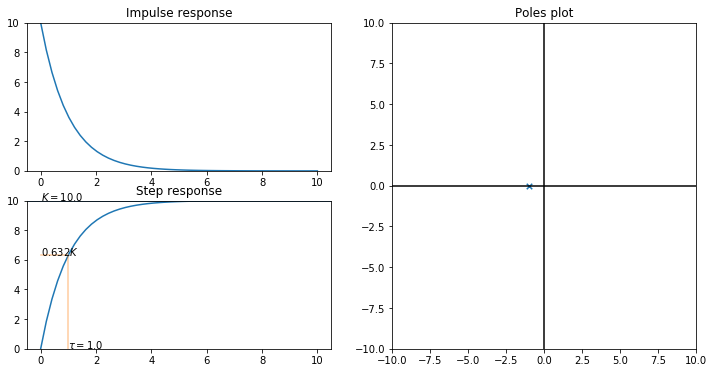

In [14]:
firstorder(1., 10.)

In [15]:
interact(firstorder, tau_in=(0.1, 10.), K_in=(0.1, 10.));

interactive(children=(FloatSlider(value=5.05, description='tau_in', max=10.0, min=0.1), FloatSlider(value=5.05…

Exploration of the above interaction allows us to see the following:

* $K$ scales the response in the $y$ direction
* $\tau$ scales the response in the $t$ direction
* The response of the system is always $0.63K$ when $t=\tau$

We get the "magic number" 0.63 by substituting $t=\tau$ into the response:

In [16]:
sympy.N((stepresponse.subs(t, tau)/K).simplify())